In [1]:
import pandas as pd
import os

In [28]:
classes = ['bicycle', 'bus', 'car', 'carrier', 'cat', 'dog', 'motorcycle', 
        'movable_signage', 'person', 'scooter', 'stroller', 'truck', 'wheelchair', 
        'barricade', 'bench', 'bollard', 'chair', 'fire_hydrant', 'kiosk', 'parking_meter', 
        'pole', 'potted_plant', 'power_controller', 'stop', 'table', 'traffic_light', 
        'traffic_light_controller', 'traffic_sign', 'tree_trunk']

In [3]:
columns_dict = {label: name for label, name in enumerate(classes)}

In [4]:
train_df = pd.DataFrame()

In [5]:
file_list = os.listdir("./yolov7/yolov7/data/train/labels")

In [6]:
image_ids = []
class_name = []
class_id = []
x_min = []
y_min = []
x_max = []
y_max = []
width = 1920
height = 1080

In [7]:
for file_name in file_list:
    f = open("./yolov7/yolov7/data/train/labels/"+file_name, 'r', encoding='utf-8')
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        label,x_center,y_center,w,h  = map(float, line.split())
        label = int(label)
        image_ids.append(file_name.split('.')[0])
        class_name.append(columns_dict[label])
        class_id.append(label)
        x_center *= width
        w *= width
        y_center *= height
        h *= height
        x1 = x_center-w/2
        x2 = x_center+w/2
        y1 = y_center-h/2
        y2 = y_center+h/2
        x_min.append(x1)
        x_max.append(x2)
        y_min.append(y1)
        y_max.append(y2)
    f.close()

In [8]:
train_df['image_id'] = image_ids
train_df['class_id'] = class_id
train_df['class_name'] = class_name
train_df['x_min'] = x_min
train_df['y_min'] = y_min
train_df['x_max'] = x_max
train_df['y_max'] = y_max
train_df

image_id  class_id     class_name       x_min      y_min  \
0       MP_SEL_008995        27   traffic_sign   340.49952  310.38066   
1       MP_SEL_008995         2            car   624.19968  394.00020   
2       MP_SEL_008995        25  traffic_light   969.20064  228.60036   
3       MP_SEL_008995         2            car     0.00096  394.20000   
4       MP_SEL_008995        20           pole  1444.39872   -0.00054   
...               ...       ...            ...         ...        ...   
886076  MP_SEL_019461        23           stop   336.41088  177.03954   
886077  MP_SEL_019461        20           pole   854.29920   86.00040   
886078  MP_SEL_019461        28     tree_trunk   794.54976  304.40016   
886079  MP_SEL_019461         2            car     2.00064  524.00034   
886080  MP_SEL_019461        14          bench   241.00032  706.89942   

             x_max      y_max  
0        380.11872  354.10014  
1        684.69888  448.30044  
2        996.00000  314.30052  
3        272.40096  538.99992  
4       1486.18944  531.69966  
...            ...        ...  
886076   444.23040  761.84982  
886077   864.89952  549.24048  
886078   808.81920  555.58008  
886079    64.00128  591.00030  
886080   442.10112  840.99978  

[886081 rows x 7 columns]

In [9]:
# !pip install plotly

In [10]:
import pandas as pd; pd.options.mode.chained_assignment = None
import numpy as np

# Built In Imports
from datetime import datetime
from glob import glob
import warnings
import IPython
import urllib
import zipfile
import pickle
import shutil
import string
import math
import tqdm
import time
import os
import gc
import re

# Visualization Imports
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from PIL import Image
import matplotlib
import plotly
import PIL
import cv2
from pycocotools.coco import COCO

# Other Imports
from tqdm.notebook import tqdm

LABEL_COLORS = [px.colors.label_rgb(px.colors.convert_to_RGB_255(x)) for x in sns.color_palette("Spectral", 10)]
LABEL_COLORS_WOUT_NO_FINDING = LABEL_COLORS[:8]+LABEL_COLORS[9:]

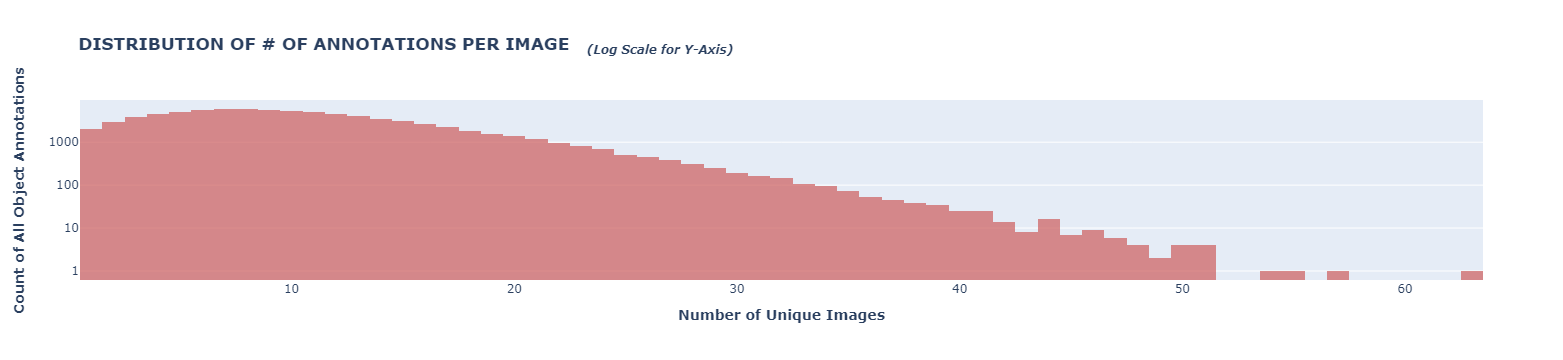

In [11]:
#Annotation Per Images
#한 이미지에 몇 개의 Bounding box가 있는지, 그 분포를 나타낸 결과입니다.
fig = px.histogram(train_df.image_id.value_counts(), 
                   log_y=True, color_discrete_sequence=['indianred'], opacity=0.7,
                   labels={"value":"Number of Annotations Per Image"},
                   title="<b>DISTRIBUTION OF # OF ANNOTATIONS PER IMAGE   " \
                         "<i><sub>(Log Scale for Y-Axis)</sub></i></b>",
                   )
fig.update_layout(showlegend=False,
                  xaxis_title="<b>Number of Unique Images</b>",
                  yaxis_title="<b>Count of All Object Annotations</b>",)
fig.show()

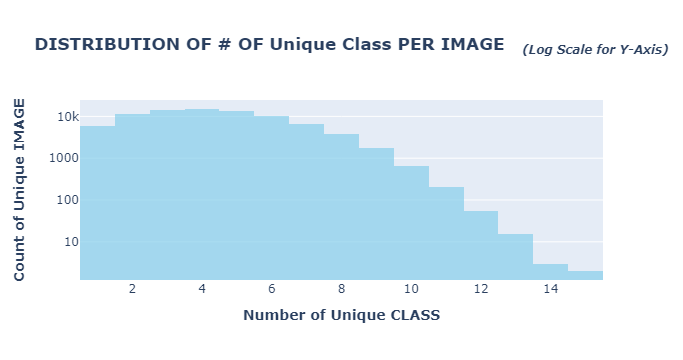

In [13]:
#Unique Class Per Image
#한 이미지의 몇 개의 unique한 class가 있는지, 그 분포를 나타낸 결과입니다.
fig = px.histogram(train_df.groupby('image_id')["class_id"].unique().apply(lambda x: len(x)), 
             log_y=True, color_discrete_sequence=['skyblue'], opacity=0.7,
             labels={"value":"Number of Unique class"},
             title="<b>DISTRIBUTION OF # OF Unique Class PER IMAGE   " \
                   "<i><sub>(Log Scale for Y-Axis)</sub></i></b>",
                   )
fig.update_layout(showlegend=False,
                  xaxis_title="<b>Number of Unique CLASS</b>",
                  yaxis_title="<b>Count of Unique IMAGE</b>",)
fig.show()

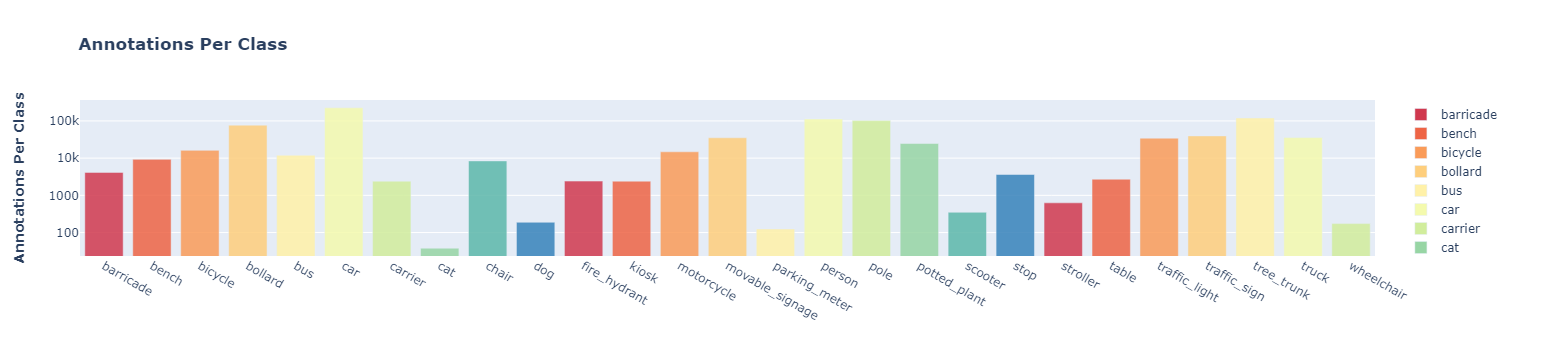

In [14]:
#Annotations Per Class
#각 Class 당 몇 개의 Annotation, 즉 bbox가 있는지, 그 분포를 나타낸 결과입니다.
fig = px.bar(train_df.class_name.value_counts().sort_index(), 
             color=train_df.class_name.value_counts().sort_index().index, opacity=0.85,
             color_discrete_sequence=LABEL_COLORS, log_y=True,
             labels={"y":"Annotations Per Class", "x":""},
             title="<b>Annotations Per Class</b>",)
fig.update_layout(legend_title=None,
                  xaxis_title="",
                  yaxis_title="<b>Annotations Per Class</b>")

fig.show()

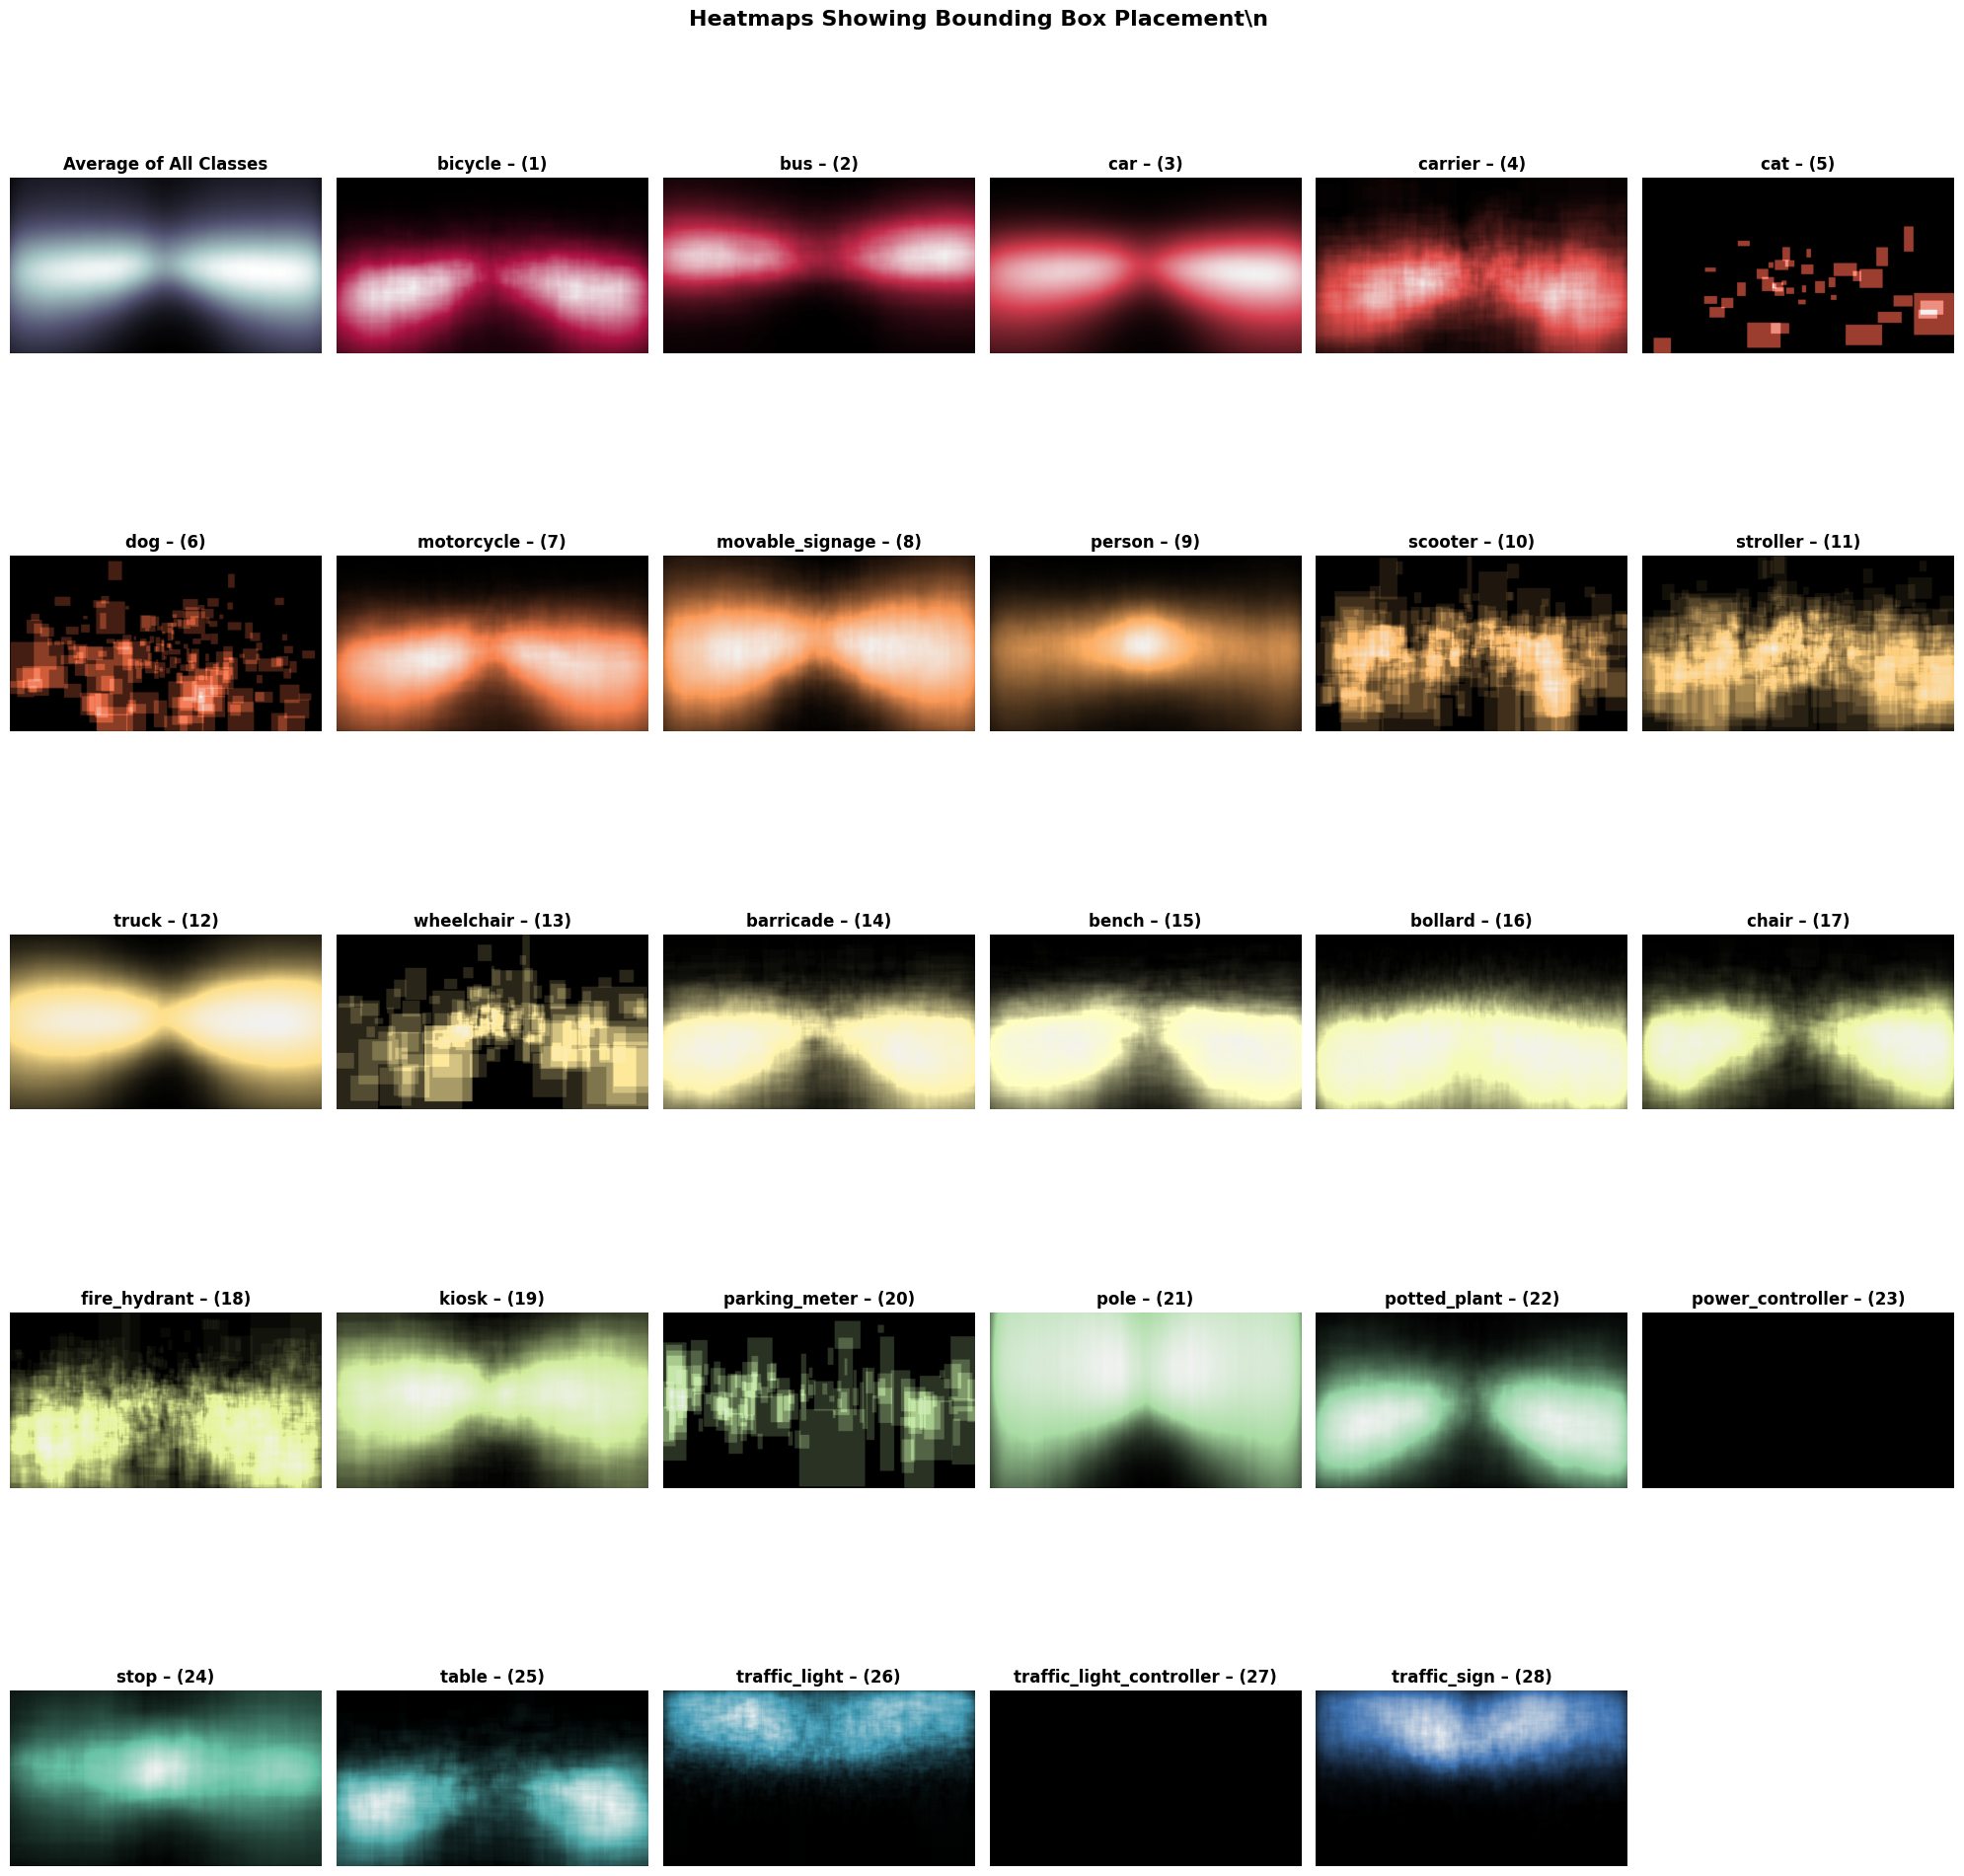

In [21]:
#Object heatmap
#이미지에서 bbox가 주로 어디에 위치하는지를 알아보기 위한 코드입니다.
bbox_df = pd.DataFrame()
bbox_df['class_id'] = train_df['class_id'].values
bbox_df['class_name'] = train_df['class_name'].values
bbox_df['x_min'] = train_df['x_min'].values / width
bbox_df['x_max'] = train_df['x_max'].values / width
bbox_df['y_min'] = train_df['y_min'].values / height
bbox_df['y_max'] = train_df['y_max'].values / height
bbox_df['frac_x_min'] = train_df['x_min'].values / width
bbox_df['frac_x_max'] = train_df['x_max'].values / width
bbox_df['frac_y_min'] = train_df['y_min'].values / height
bbox_df['frac_y_max'] = train_df['y_max'].values / height

ave_src_img_height = height
ave_src_img_width = width

# DEFAULT
HEATMAP_SIZE = (ave_src_img_height, ave_src_img_width, 29)

# Initialize
heatmap = np.zeros((HEATMAP_SIZE), dtype=np.int16)
bbox_np = bbox_df[["class_id", "frac_x_min", "frac_x_max", "frac_y_min", "frac_y_max"]].to_numpy()
bbox_np[:, 1:3] *= ave_src_img_width
bbox_np[:, 3:5] *= ave_src_img_height
bbox_np = np.floor(bbox_np).astype(np.int16)

# Color map stuff
custom_cmaps = [
    matplotlib.colors.LinearSegmentedColormap.from_list(
        colors=[(0.,0.,0.), c, (0.95,0.95,0.95)], 
        name=f"custom_{i}") for i,c in enumerate(sns.color_palette("Spectral", 29))
]
# custom_cmaps.pop(8) # Remove No-Finding

for row in tqdm(bbox_np, total=bbox_np.shape[0]):
    heatmap[row[3]:row[4]+1, row[1]:row[2]+1, row[0]] += 1
    
fig = plt.figure(figsize=(20,25))
plt.suptitle("Heatmaps Showing Bounding Box Placement\\n ", fontweight="bold", fontsize=16)
for i in range(29):
    plt.subplot(6, 6, i+1)
    if i==0:
        plt.imshow(heatmap.mean(axis=-1), cmap="bone")
        plt.title(f"Average of All Classes", fontweight="bold")
    else:
        plt.imshow(heatmap[:, :, i-1], cmap=custom_cmaps[i-1])
        plt.title(f"{classes[i-1]} – ({i})", fontweight="bold")
        
    plt.axis(False)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

In [ ]:
#Distribution of bbox area
#각 Class 별 bounding box의 크기 분포입니다.
# Update bbox dataframe to make this easier
bbox_df["frac_bbox_area"] = (bbox_df["frac_x_max"]-bbox_df["frac_x_min"])*(bbox_df["frac_y_max"]-bbox_df["frac_y_min"])
# bbox_df["class_id_as_str"] = bbox_df["class_id"].map(classes)
display(bbox_df.head())

fig = px.box(bbox_df.sort_values(by="class_name"), x="class_name", y="frac_bbox_area", color="class_name", 
             color_discrete_sequence=LABEL_COLORS_WOUT_NO_FINDING, notched=True,
             labels={"class_name":"Class Name", "frac_bbox_area":"BBox Area (%)"},
             title="<b>DISTRIBUTION OF BBOX AREAS AS % OF SOURCE IMAGE AREA   " \\
                   "<i><sub>(Some Upper Outliers Excluded For Better Visualization)</sub></i></b>")

fig.update_layout(showlegend=True,
                  yaxis_range=[-0.025,0.4],
                  legend_title_text=None,
                  xaxis_title="",
                  yaxis_title="<b>Bounding Box Area %</b>",)
fig.show()

x_min     x_max     y_min     y_max  frac_x_min  frac_x_max  \
class_id                                                                   
0         0.460080  0.534573  0.482275  0.621733    0.460080    0.534573   
1         0.438165  0.550153  0.364857  0.500450    0.438165    0.550153   
2         0.447198  0.555135  0.429281  0.553316    0.447198    0.555135   
3         0.467873  0.538761  0.483207  0.640719    0.467873    0.538761   
4         0.504541  0.548366  0.597545  0.663640    0.504541    0.548366   
5         0.485881  0.523308  0.551720  0.623388    0.485881    0.523308   
6         0.461232  0.536895  0.457085  0.606512    0.461232    0.536895   
7         0.482233  0.523347  0.405498  0.586745    0.482233    0.523347   
8         0.485419  0.512142  0.420233  0.544767    0.485419    0.512142   
9         0.466457  0.513682  0.477925  0.611739    0.466457    0.513682   
10        0.473782  0.523112  0.469616  0.590669    0.473782    0.523112   
11        0.446355  0.558297  0.385651  0.548284    0.446355    0.558297   
12        0.471231  0.528559  0.455126  0.585269    0.471231    0.528559   
13        0.459461  0.535527  0.485054  0.616694    0.459461    0.535527   
14        0.458835  0.541719  0.490890  0.580010    0.458835    0.541719   
15        0.488785  0.507975  0.504149  0.592070    0.488785    0.507975   
16        0.480429  0.530624  0.505832  0.623686    0.480429    0.530624   
17        0.486287  0.522090  0.534637  0.635057    0.486287    0.522090   
18        0.450453  0.539934  0.343139  0.574746    0.450453    0.539934   
19        0.415040  0.453227  0.402168  0.579968    0.415040    0.453227   
20        0.487716  0.517498  0.060899  0.598482    0.487716    0.517498   
21        0.476854  0.530771  0.486225  0.630332    0.476854    0.530771   
23        0.447409  0.556410  0.338862  0.554652    0.447409    0.556410   
24        0.470734  0.554454  0.506386  0.622846    0.470734    0.554454   
25        0.481770  0.508780  0.244241  0.284988    0.481770    0.508780   
27        0.490457  0.520933  0.251244  0.311983    0.490457    0.520933   
28        0.484322  0.516524  0.265956  0.575926    0.484322    0.516524   

          frac_y_min  frac_y_max  frac_bbox_area  aspect_ratio  
class_id                                                        
0           0.482275    0.621733        0.014988      0.560803  
1           0.364857    0.500450        0.023434      0.921544  
2           0.429281    0.553316        0.021888      0.970131  
3           0.483207    0.640719        0.015676      0.492730  
4           0.597545    0.663640        0.003734      0.706339  
5           0.551720    0.623388        0.003800      0.562718  
6           0.457085    0.606512        0.017362      0.532117  
7           0.405498    0.586745        0.012091      0.241279  
8           0.420233    0.544767        0.005560      0.218106  
9           0.477925    0.611739        0.008732      0.365671  
10          0.469616    0.590669        0.009182      0.417009  
11          0.385651    0.548284        0.030009      0.778018  
12          0.455126    0.585269        0.011112      0.476008  
13          0.485054    0.616694        0.014687      0.702881  
14          0.490890    0.580010        0.010793      1.147507  
15          0.504149    0.592070        0.002618      0.226654  
16          0.505832    0.623686        0.008040      0.438631  
17          0.534637    0.635057        0.005210      0.385031  
18          0.343139    0.574746        0.034172      0.413987  
19          0.402168    0.579968        0.008772      0.234123  
20          0.060899    0.598482        0.019533      0.054069  
21          0.486225    0.630332        0.010928      0.435483  
23          0.338862    0.554652        0.040487      0.583413  
24          0.506386    0.622846        0.013124      0.799574  
25          0.244241    0.284988        0.001273      1.080922  
27          0.251244    0.311983        0.002529     

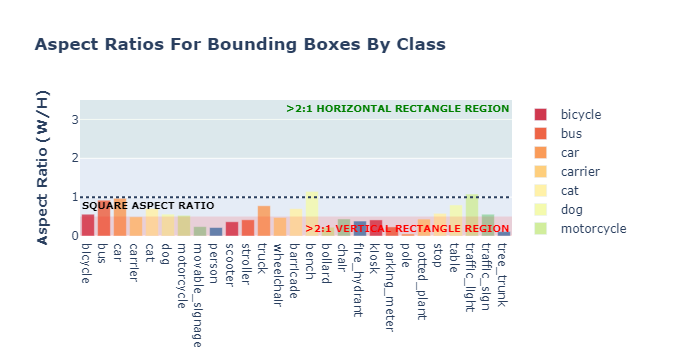

In [29]:
#Aspect Ratio for bounding boxes by class
#각 Class 별 bounding box의 aspect ratio 값입니다. 이를 활용하여 anchor generator의 aspect ratio 비율을 조절해볼 수 있습니다.
bbox_df["aspect_ratio"] = (bbox_df["x_max"]-bbox_df["x_min"])/(bbox_df["y_max"]-bbox_df["y_min"])

# Display average means for each class_id so we can examine the newly created Aspect Ratio Column
display(bbox_df.groupby("class_id").mean())

# Generate the bar plot
#remove empty classes
re_classes = classes.copy()
re_classes.remove("power_controller")
re_classes.remove("traffic_light_controller")
fig = px.bar(x=re_classes, y=bbox_df.groupby("class_id").mean()["aspect_ratio"], 
             color=re_classes, opacity=0.85,
             color_discrete_sequence=LABEL_COLORS_WOUT_NO_FINDING, 
             labels={"x":"Class Name", "y":"Aspect Ratio (W/H)"},
             title="<b>Aspect Ratios For Bounding Boxes By Class</b>",)
fig.update_layout(
                  yaxis_title="<b>Aspect Ratio (W/H)</b>",
                  xaxis_title=None,
                  legend_title_text=None)
fig.add_hline(y=1, line_width=2, line_dash="dot", 
              annotation_font_size=10, 
              annotation_text="<b>SQUARE ASPECT RATIO</b>", 
              annotation_position="bottom left", 
              annotation_font_color="black")
fig.add_hrect(y0=0, y1=0.5, line_width=0, fillcolor="red", opacity=0.125,
              annotation_text="<b>>2:1 VERTICAL RECTANGLE REGION</b>", 
              annotation_position="bottom right", 
              annotation_font_size=10,
              annotation_font_color="red")
fig.add_hrect(y0=2, y1=3.5, line_width=0, fillcolor="green", opacity=0.04,
              annotation_text="<b>>2:1 HORIZONTAL RECTANGLE REGION</b>", 
              annotation_position="top right", 
              annotation_font_size=10,
              annotation_font_color="green")
fig.show()